In [150]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import os
from datascience import *
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

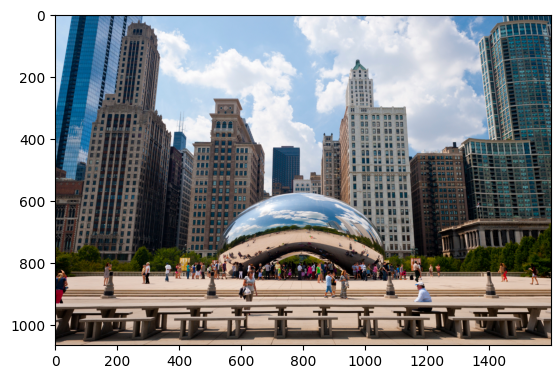

(1065, 1600, 3)


In [207]:
%matplotlib inline
#read image into an array
pic = mpimg.imread('./images2/city1.jpg')

imgplot = plt.imshow(pic)
plt.show()
print(pic.shape)

In [203]:
imgplot

### 1. Create list of image names

and list of picture class

In [107]:
#picture list for pictures process for loop
pic_list = [i for i in os.listdir('./images2') if '.jpg' in i]

#class list for pictures table
class_list = []
for i in pic_list:
    text = i.split('.')[0]
    class_list.append(re.sub(r'\d+', '', text))

2. Create the scatter plot in the first page
Create a scatter plot using the farm/city/desert image data set where each point represents an image, the x axis is the percent green in the image, and the y axis represents the percent blue. The plot should be titled with x and y axis labels, a different color for each of the 3 image classes, and a legend showing which class corresponds to which color. Note: this is with 24 images total, so you will likely want to find some way to automate the process of getting this data for the scatterplot. You can use a for loop to do this. Get the image file name by reading it from the image_files list from step 1. Then perform image processing to get the percent of blue and the percent of green. 

In [111]:
##creating table
#step 1, instantiate table
pictures_rgb = Table(['red','green','blue'])
#step 2 read all of the images in for loop, normalize and get percentage of rgb:
for i in pic_list:
    #read pic
    pic = mpimg.imread(f'./images2/{i}')
    #rgb processing
    normalized_p = pic/255
    red = normalized_p[:, :, 0]
    green = normalized_p[:, :, 1]
    blue = normalized_p[:, :, 2]
    total = red.sum() + green.sum() + blue.sum()
    red_percent = red.sum()/total * 100
    green_percent = green.sum()/total * 100
    blue_percent = blue.sum()/total * 100
    #append to table
    pictures_rgb = pictures_rgb.with_row([red_percent,green_percent,blue_percent])

#add the class list
pictures_rgb = pictures_rgb.with_column('class', class_list)

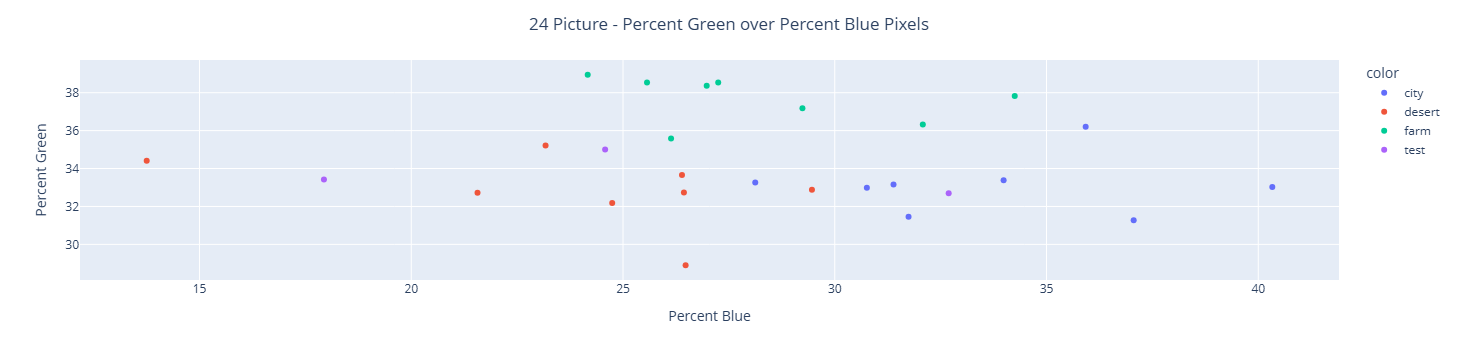

In [116]:
#create the scatter plot
fig = px.scatter(x=pictures_rgb.column('blue'), y=pictures_rgb.column('green'), color=pictures_rgb.column('class'))
fig.update_layout(title = '24 Picture - Percent Green over Percent Blue Pixels'
                 , title_x=.5
                 )
fig.update_xaxes(title='Percent Blue')
fig.update_yaxes(title='Percent Green')
fig.show()

3. Now create an array of strings called training_target with the category of each.

In [120]:
training_target = [i for i in class_list if i != 'test']
training_target = np.array(training_target)
training_target

array(['city', 'city', 'city', 'city', 'city', 'city', 'city', 'city',
       'desert', 'desert', 'desert', 'desert', 'desert', 'desert',
       'desert', 'desert', 'farm', 'farm', 'farm', 'farm', 'farm', 'farm',
       'farm', 'farm'],
      dtype='<U6')

4. Create an empty array of zeros called training_data that will eventually store the percent green and percent blue values.
You will be filling this soon. Given the needs of your data set (24 samples and 2 columns), it should have 24 rows and 2 columns


In [124]:
training_data = np.zeros((24,2))
training_data

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

5. Now fill the training_data array with the proper values for each image, and observe the values in the array after it is finished.
You already have the percent of blue and the percent of green for all images from step 2. Make sure to put those two values in the proper place in the training_data array.


In [135]:
#using the table already created in question 1 and filtering out the test pictures
training_table = pictures_rgb.where('class', are.not_containing('test'))

In [143]:
#green column is 0
training_data[:,0] = training_table.column('green')

#blue column is 1
training_data[:,1] = training_table.column('blue')

In [144]:
training_data

array([[ 33.38469314,  33.98700045],
       [ 31.45895048,  31.74233399],
       [ 32.98431326,  30.75773203],
       [ 33.0230581 ,  40.33120676],
       [ 31.2767466 ,  37.05807357],
       [ 36.19870064,  35.92477223],
       [ 33.26394752,  28.12240743],
       [ 33.15565422,  31.38749051],
       [ 28.89797524,  26.47798606],
       [ 32.88747776,  29.46128271],
       [ 32.17566357,  24.744815  ],
       [ 35.20926067,  23.17126104],
       [ 32.71851752,  21.56490897],
       [ 33.65407473,  26.3925021 ],
       [ 34.41588732,  13.75343251],
       [ 32.73203942,  26.43832819],
       [ 38.53932547,  27.24792164],
       [ 38.94802585,  24.16669047],
       [ 37.17657793,  29.23681844],
       [ 38.53495312,  25.56726883],
       [ 38.36897488,  26.97619626],
       [ 37.82509052,  34.24936437],
       [ 35.57994306,  26.13483838],
       [ 36.31833656,  32.07921474]])

6. Create your classifier. 
This can often be done in one line. In this case, we suggest using the k-Nearest Neighbors classifier as shown in the tutorial (use k=1), but you can try others if you are interested. 


In [176]:
#k-NN classifier for k=1
k1 = KNeighborsClassifier(n_neighbors=1, weights='distance')


7. Train your classifier. 
Again, this is often only one line of code where you provide the training data and the training target to the classifier you just created to the classifier’s ‘fit’ or ‘training’ function. For such a small data set, this will be fast, but for larger data sets sometimes this is time consuming.
Now you have a trained classifier... great! Now we’ll set up the application for it.


In [177]:
#model
k1.fit(training_data, training_table.column('class'))


,n_neighbors,1
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


8. Now create an empty test_data array and fill it with the proper values for each test image, and observe the filled array and consider if it matches your expectations based on your observations of the images.
test_data should start with zeros and be 3 rows (for three test images) and 2 columns (for % green then % blue for each image). Loop through the three test images to fill in the values of the array.


In [178]:
test_data = np.zeros((3,2))
test_data

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [179]:
#using the table already created in question 1 and filtering out the test pictures
test_table = pictures_rgb.where('class', are.equal_to('test'))

#green column is 0
test_data[:,0] = test_table.column('green')

#blue column is 1
test_data[:,1] = test_table.column('blue')

In [180]:
test_data

array([[ 32.69517003,  32.68992216],
       [ 33.42796517,  17.93877767],
       [ 35.00500457,  24.5775562 ]])

9. Predict the class of the test images. 
Now predict the classes given the test_data array. This should only take one line of code if the test_data array is prepared.


In [181]:
k1_pred = k1.predict(test_data)
print(k1_pred)

['city' 'desert' 'desert']


10. Print the prediction from the test images and compare with the actual images shown below. Make this comparison clear in the output of your code (e.g. prepend with ‘predicted:’ and ‘actual:’). Try to explain any errors if you note any.

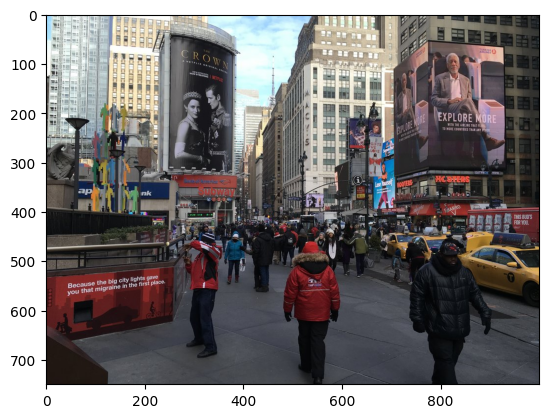

Actual: above picture
Predicted: city


In [214]:
pic = mpimg.imread('./images2/test1.jpg')

imgplot = plt.imshow(pic)
plt.show()


print("Actual: above picture (city)")
print(f"Predicted: {k1_pred[0]}")

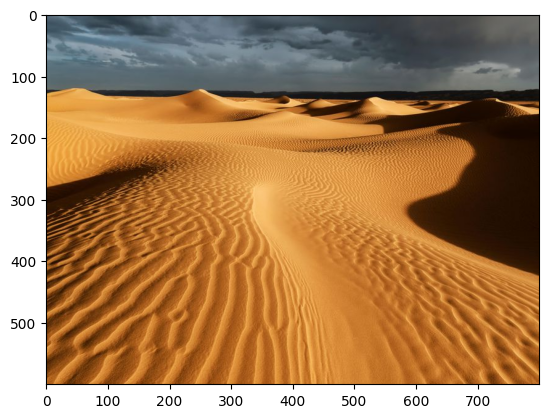

Actual: above picture (desert)
Predicted: desert


In [216]:
pic = mpimg.imread('./images2/test2.jpg')

imgplot = plt.imshow(pic)
plt.show()


print("Actual: above picture (desert)")
print(f"Predicted: {k1_pred[1]}")

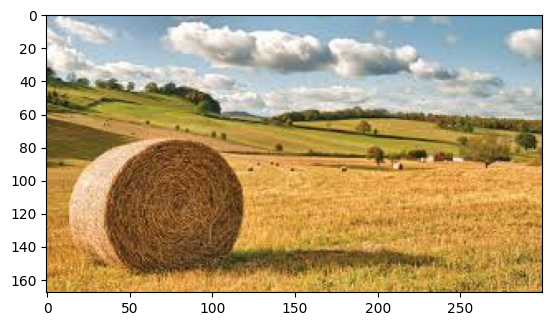

Actual: above picture (farm)
Predicted: desert


In [218]:
pic = mpimg.imread('./images2/test3.jpg')

imgplot = plt.imshow(pic)
plt.show()


print("Actual: above picture (farm)")
print(f"Predicted: {k1_pred[2]}")